In [ ]:
set.seed(2021)

subjects <- 30
controls <- 60
n <- subjects + controls

group <- c(rep('control', controls), rep('subject', subjects))
tendon.tear <- as.vector(model.matrix(~ group)[,2])
gender <- c(sample(c('female','male'), controls, prob=c(0.55,0.45),replace=T),
            sample(c('female','male'), subjects, prob=c(0.35,0.65),replace=T))
bmi <- round(runif(n, 18, 35) * (1 + 1.05 * runif(n) * (1 + tendon.tear)),1)
wt <- round(bmi * 7 + runif(n, 5, 10),1)

dat <- data.frame(tendon.tear,group,gender,wt,bmi)
t.test(dat[tendon.tear==0,'bmi'], dat[tendon.tear==1,'bmi'])


	Welch Two Sample t-test

data:  dat[tendon.tear == 0, "bmi"] and dat[tendon.tear == 1, "bmi"]
t = -3.2049, df = 38.103, p-value = 0.002732
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.220163  -4.339837
sample estimates:
mean of x mean of y 
    38.15     49.93 


In [ ]:
cor(wt,bmi)

[1] 0.9999021

In [ ]:
gout <- c(sample(0:1, controls, prob=c(0.8,0.2),replace=T), sample(0:1, subjects, prob=c(0.8,0.2),replace=T))
dat$gout <- gout

cipro <- c(sample(0:1, controls, prob=c(0.95,0.05),replace=T), sample(0:1, subjects, prob=c(0.99,0.01),replace=T))
dat$cipro <- cipro

 diabetes <- round(round(bmi)/100)

dat$diabetes <- diabetes

head(dat)

,tendon.tear,group,gender,wt,bmi,gout,cipro,diabetes
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,control,female,283.9,39.6,0,0,0
2,0,control,male,263.9,36.9,0,0,0
3,0,control,male,340.7,47.5,0,0,0
4,0,control,female,319.1,44.3,1,0,0
5,0,control,male,237.9,33.0,0,0,0
6,0,control,male,324.3,45.0,0,1,0


In [ ]:
summary(glm(tendon.tear ~ gender + bmi + gout + cipro))


Call:
glm(formula = tendon.tear ~ gender + bmi + gout + cipro)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5898  -0.3149  -0.1850   0.3876   0.9759  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.216767   0.153400  -1.413 0.161281    
gendermale   0.087027   0.095261   0.914 0.363525    
bmi          0.011414   0.003274   3.487 0.000777 ***
gout         0.129427   0.123488   1.048 0.297565    
cipro       -0.123066   0.205074  -0.600 0.550031    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.195568)

    Null deviance: 20.000  on 89  degrees of freedom
Residual deviance: 16.623  on 85  degrees of freedom
AIC: 115.4

Number of Fisher Scoring iterations: 2


In [ ]:
cor(diabetes,bmi)

[1] 0.7753801

In [ ]:
summary(glm(tendon.tear ~ gender + bmi + gout + diabetes + cipro))


Call:
glm(formula = tendon.tear ~ gender + bmi + gout + diabetes + 
    cipro)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6806  -0.2897  -0.1810   0.3459   0.9353  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.097907   0.197434  -0.496    0.621
gendermale   0.087553   0.095309   0.919    0.361
bmi          0.007708   0.005072   1.520    0.132
gout         0.122002   0.123792   0.986    0.327
diabetes     0.170439   0.178096   0.957    0.341
cipro       -0.118016   0.205243  -0.575    0.567

(Dispersion parameter for gaussian family taken to be 0.1957618)

    Null deviance: 20.000  on 89  degrees of freedom
Residual deviance: 16.444  on 84  degrees of freedom
AIC: 116.42

Number of Fisher Scoring iterations: 2


In [ ]:
install.packages("corrplot")
require(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
d <- subset(dat,select=-c(gender,group))

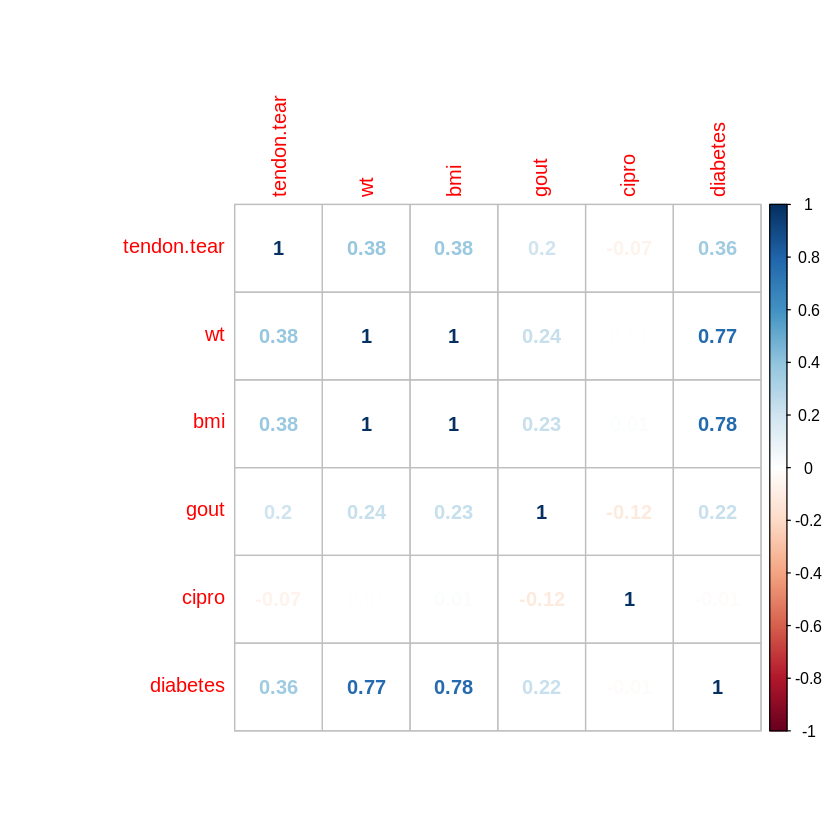

In [ ]:
d <- as.data.frame(sapply(d, as.numeric))
M <- cor(d)

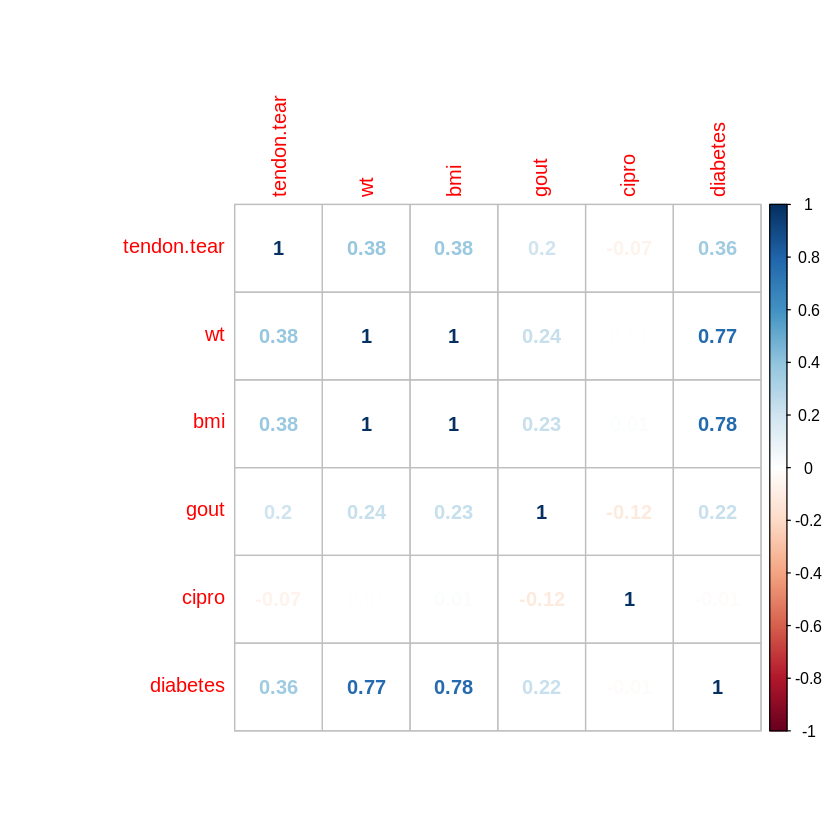

In [ ]:
corrplot(M, method=c("number"))
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

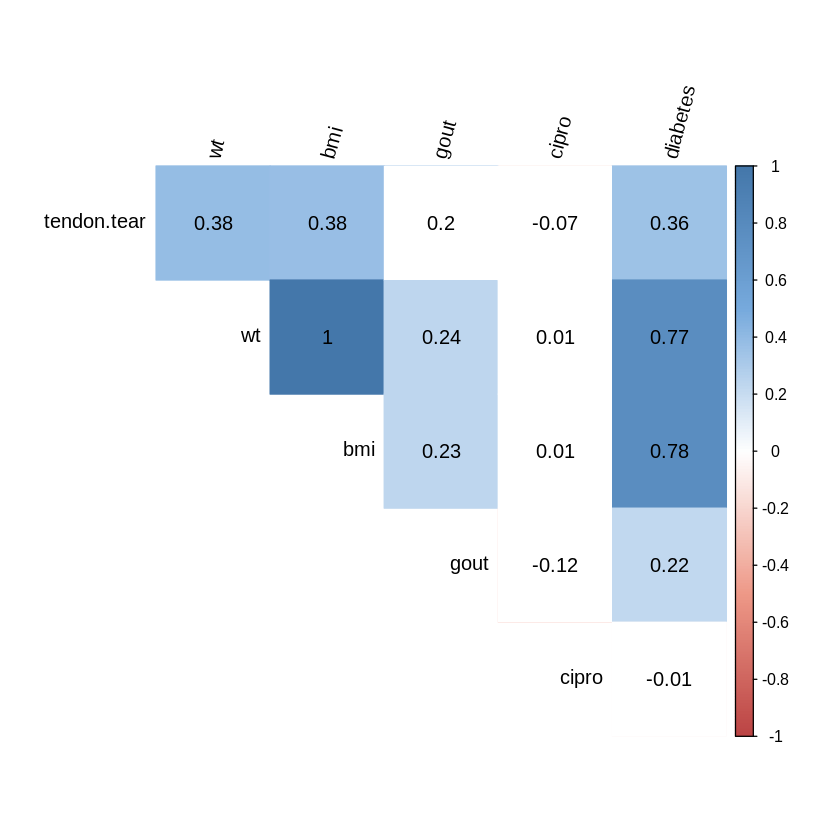

In [ ]:
corrplot2 <- function(data,
                      method = "pearson",
                      sig.level = 0.05,
                      order = "original",
                      diag = FALSE,
                      type = "upper",
                      tl.srt = 90,
                      number.font = 1,
                      number.cex = 1,
                      mar = c(0, 0, 0, 0)) {
  library(corrplot)
  data_incomplete <- data
  data <- data[complete.cases(data), ]
  mat <- cor(data, method = method)
  cor.mtest <- function(mat, method) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat <- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
      for (j in (i + 1):n) {
        tmp <- cor.test(mat[, i], mat[, j], method = method)
        p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
      }
    }
    colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
    p.mat
  }
  p.mat <- cor.mtest(data, method = method)
  col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
  corrplot(mat,
    method = "color", col = col(200), number.font = number.font,
    mar = mar, number.cex = number.cex,
    type = type, order = order,
    addCoef.col = "black", # add correlation coefficient
    tl.col = "black", tl.srt = tl.srt, # rotation of text labels
    # combine with significance level
    p.mat = p.mat, sig.level = sig.level, insig = "blank",
    # hide correlation coefficiens on the diagonal
    diag = diag
  )
}

corrplot2(
  data = d,
  method = "pearson",
  sig.level = 0.05,
  order = "original",
  diag = FALSE,
  type = "upper",
  tl.srt = 75
)